In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [70]:
data = pd.read_csv('dados_rpm_100hz.csv')
data.head()

,rpm
0,581.40
1,857.14
2,857.14
3,1264.04
4,1203.21


In [71]:
resposta = data['rpm']

In [72]:
freq_de_corte = 0.009 # Ajuste conforme necessário
ordem = 2

# Obter os coeficientes do filtro Butterworth
b, a = butter(ordem, freq_de_corte, btype='low', analog=False)

# Aplicar o filtro aos dados
resposta_filtrada = filtfilt(b, a, resposta)
resposta_filtrada = pd.DataFrame(resposta_filtrada)
resposta_filtrada.head()

,0
0,1216.555657
1,1252.066633
2,1287.985726
3,1324.301777
4,1361.003422


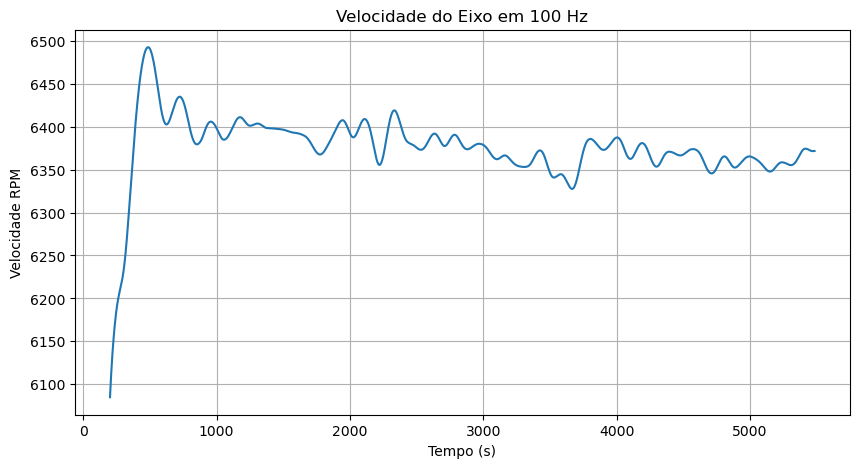

In [73]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(resposta_filtrada.iloc[200:])
# plt.plot(resposta_filtrada.iloc[200:500])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 100 Hz')
plt.grid()
plt.show()